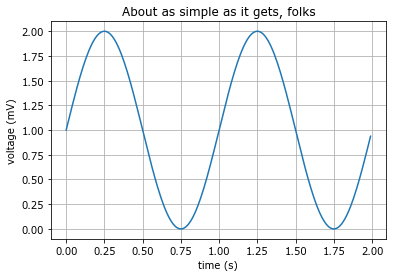

In [504]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

In [505]:
#图片
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

path='/Users/yexianyong/Desktop/jupyter_notebook/工具学习/matplotlib_pic.png'
img=mpimg.imread(path)
#数据说明：
#[ 0.40784314,  0.40784314,  0.40784314]这是一个像素点的rgb
"""
这是一排像素点
[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],
"""
"""
这就是多排组成的图片了
[[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        ..., 
"""
img

array([[[ 0.3137255 ,  0.19215687,  0.25098041,  1.        ],
        [ 0.32549021,  0.20392157,  0.26274511,  1.        ],
        [ 0.33333334,  0.21176471,  0.27058825,  1.        ],
        ..., 
        [ 0.23137255,  0.13333334,  0.11764706,  1.        ],
        [ 0.24705882,  0.17254902,  0.15686275,  1.        ],
        [ 0.27450982,  0.20784314,  0.18039216,  1.        ]],

       [[ 0.32156864,  0.2       ,  0.25882354,  1.        ],
        [ 0.32156864,  0.2       ,  0.25882354,  1.        ],
        [ 0.33333334,  0.20784314,  0.26666668,  1.        ],
        ..., 
        [ 0.46666667,  0.34509805,  0.33333334,  1.        ],
        [ 0.37254903,  0.25882354,  0.24313726,  1.        ],
        [ 0.36078432,  0.26274511,  0.24313726,  1.        ]],

       [[ 0.32156864,  0.2       ,  0.25882354,  1.        ],
        [ 0.32156864,  0.2       ,  0.25882354,  1.        ],
        [ 0.32941177,  0.20392157,  0.26274511,  1.        ],
        ..., 
        [ 0.55686277,  0

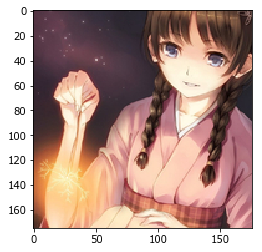

In [506]:
fig, ax = plt.subplots()
#显示全部部分
imgplot=plt.imshow(img)
plt.show()

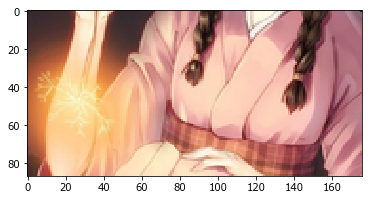

In [507]:
fig, ax = plt.subplots()
#显示下半部分
imgplot=plt.imshow(img[-int(len(img)*0.5):])
plt.show()

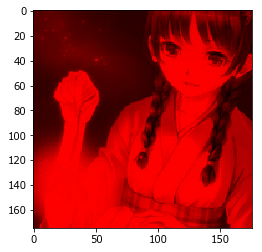

In [508]:
#获取图片红色通道色阶
fig, ax = plt.subplots()
#红色通道图片
red_img=np.zeros(img.shape)
red_img[:,:,0:1]=img[:,:,0:1]
red_img[:,:,-1]=img[:,:,-1]
imgplot=plt.imshow(red_img)
plt.show()

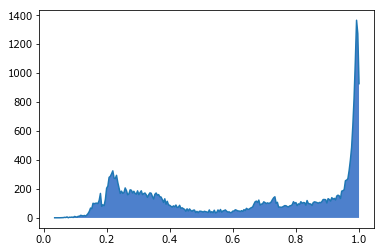

In [509]:
#红色通道色阶可视化
import pandas as pd
level=img[:,:,0:1].reshape([len(img)*len(img[0])])
data=pd.DataFrame(level)
grouped=data.groupby(0).size()

fig,ax=plt.subplots()
ax.plot(grouped.index,grouped.values)
ax.fill_between(grouped.index,grouped.values,where=grouped.values<=max(grouped.values),facecolor=(0.3,0.5,0.8))
plt.show()

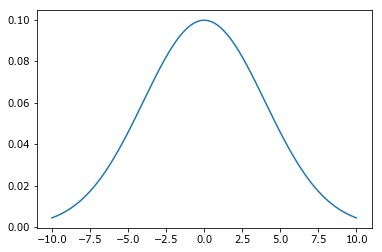

In [510]:
#高斯模糊
#http://accu.cc/content/pil/spatial_filter_gaussian_blur/
import math

def gaussian_dis(r):
    sigma=4
    return 1 / math.sqrt((2 * math.pi * sigma ** 2))* math.exp((-r**2) / (2 * sigma ** 2))


t = np.arange(-10.0, 10.0, 0.01)
s = np.array([gaussian_dis(x) for x in t])
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [511]:
#模糊半径
r=10
#权重矩阵11X11(5*2+1)
#取 σ = 1.5, 并假定中心坐标为 (0, 0), 代入公式, 
#则容易得到包含中心坐标在内的 25(即: 模糊半径 r=2) 个坐标的权重为

weights=np.arange(121,dtype='float').reshape([11,11])
for y in weights:
    for x in y:
        index=np.argwhere(weights==x)
        weights[index[0][0],index[0][1]]=math.sqrt(pow(index[0][0]-5,2)+pow(index[0][1]-5,2))
weights

array([[ 7.07106781,  6.40312424,  5.83095189,  5.38516481,  5.09901951,
         5.        ,  5.09901951,  5.38516481,  5.83095189,  6.40312424,
         7.07106781],
       [ 6.40312424,  5.65685425,  5.        ,  4.47213595,  4.12310563,
         4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425,
         6.40312424],
       [ 5.83095189,  5.        ,  4.24264069,  3.60555128,  3.16227766,
         3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ,
         5.83095189],
       [ 5.38516481,  4.47213595,  3.60555128,  2.82842712,  2.23606798,
         2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595,
         5.38516481],
       [ 5.09901951,  4.12310563,  3.16227766,  2.23606798,  1.41421356,
         1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563,
         5.09901951],
       [ 5.        ,  4.        ,  3.        ,  2.        ,  1.        ,
         0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.   

In [512]:
#高斯分布计算
weights=np.array([[gaussian_dis(x) for x in y] for y in weights])
#归一化，所有数据和为1
def softmax(vec):
    return vec/np.sum(vec)
weights=softmax(weights)
weights

array([[ 0.00301223,  0.00399056,  0.00496633,  0.00580623,  0.00637689,
         0.00657932,  0.00637689,  0.00580623,  0.00496633,  0.00399056,
         0.00301223],
       [ 0.00399056,  0.00528663,  0.00657932,  0.007692  ,  0.00844801,
         0.00871618,  0.00844801,  0.007692  ,  0.00657932,  0.00528663,
         0.00399056],
       [ 0.00496633,  0.00657932,  0.00818809,  0.00957285,  0.01051372,
         0.01084746,  0.01051372,  0.00957285,  0.00818809,  0.00657932,
         0.00496633],
       [ 0.00580623,  0.007692  ,  0.00957285,  0.0111918 ,  0.01229178,
         0.01268197,  0.01229178,  0.0111918 ,  0.00957285,  0.007692  ,
         0.00580623],
       [ 0.00637689,  0.00844801,  0.01051372,  0.01229178,  0.01349988,
         0.01392842,  0.01349988,  0.01229178,  0.01051372,  0.00844801,
         0.00637689],
       [ 0.00657932,  0.00871618,  0.01084746,  0.01268197,  0.01392842,
         0.01437055,  0.01392842,  0.01268197,  0.01084746,  0.00871618,
         0.006

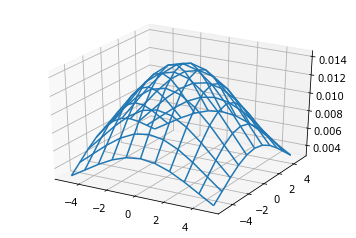

In [513]:
#可视化正态分布数据
#https://matplotlib.org/examples/mplot3d/subplot3d_demo.html
fig=plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

X=np.arange(-5,6,1)
Y=X
Z=np.array([gaussian_dis(np.sqrt(pow(x,2)+pow(y,2))) for x,y in zip(X,Y)])
X, Y = np.meshgrid(X, Y)

ax.plot_wireframe(X,Y,weights)
plt.show()


(175, 176, 3) (175, 176, 3)


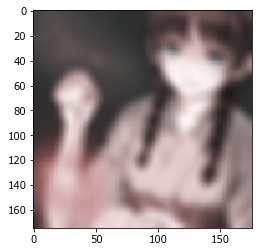

In [514]:
#开始高斯模糊
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.convolve.html
import scipy

#卷积层:卷积层深度与图像通道数保持一致
filters=np.zeros([len(weights),len(weights[0]),4])
filters[:,:,0]=weights
filters[:,:,1]=weights
filters[:,:,2]=weights
# print(filters)

#卷积操作
convolution=scipy.ndimage.filters.convolve(img[:,:,0:3],filters)
convolution=convolution/np.max(convolution)

print(img_copy.shape,convolution.shape)
#输出模糊后图片
fig, ax = plt.subplots()
imgplot=plt.imshow(convolution)
plt.show()


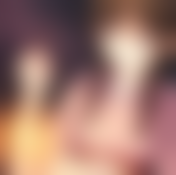

In [515]:
#与PIL实现的效果对比
import PIL.Image
import PIL.ImageFilter
im = PIL.Image.open(path)
im = im.filter(PIL.ImageFilter.GaussianBlur(radius=r))
im